In [21]:
import os
import sys

print("Current working directory:", os.getcwd())
parent_dir = os.path.dirname(os.getcwd())
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)
    print(f"Added {parent_dir} to Python path")
else:
    print(f"{parent_dir} already in Python path")

Current working directory: /Users/jinceyang/Desktop/codebase/ml/learn_d2l/chap7
/Users/jinceyang/Desktop/codebase/ml/learn_d2l already in Python path


In [22]:
import importlib
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
import numpy as np

import importlib
from d2l.classification.model import MLPClassifierDropout, MLPClassifierDropoutTorch
from d2l.classification.dataset import FashionMNISTDataset
from d2l.base.trainer import Trainer
from d2l.base.evaluator import ClassificationEvaluator
from d2l.base.optimizer import SGDOptimizer
from d2l.base.plot import plot_loss, show_images, plot_losses
from d2l.base.utils import mps
from typing import List
from matplotlib import pyplot as plt
import torch
import numpy as np

from d2l.base.function import corr2d, corr2d_multi_in, corr2d_multi_in_out, corr2d_multi_in_out_1x1, comp_conv2d, max_pool2d, avg_pool2d

In [23]:
rng = torch.Generator().manual_seed(42)

In [24]:
data = FashionMNISTDataset()
train_data_loader = data.get_train_dataloader(batch_size=10)
train_iter = iter(train_data_loader)
X, y = next(train_iter)
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: torch.Size([10, 1, 28, 28])
y shape: torch.Size([10])


In [25]:
from d2l import LeNetClassifierTorch

lenet = LeNetClassifierTorch(
    num_outputs=10,
    rng=rng
)

lenet.init((10, 1, 28, 28))
lenet.layer_summary((10, 1, 28, 28))

              Conv2d  input shape: torch.Size([10, 1, 28, 28])
              Conv2d  output shape: torch.Size([10, 6, 28, 28])
             Sigmoid  input shape: torch.Size([10, 6, 28, 28])
             Sigmoid  output shape: torch.Size([10, 6, 28, 28])
           AvgPool2d  input shape: torch.Size([10, 6, 28, 28])
           AvgPool2d  output shape: torch.Size([10, 6, 14, 14])
              Conv2d  input shape: torch.Size([10, 6, 14, 14])
              Conv2d  output shape: torch.Size([10, 16, 10, 10])
             Sigmoid  input shape: torch.Size([10, 16, 10, 10])
             Sigmoid  output shape: torch.Size([10, 16, 10, 10])
           AvgPool2d  input shape: torch.Size([10, 16, 10, 10])
           AvgPool2d  output shape: torch.Size([10, 16, 5, 5])
             Flatten  input shape: torch.Size([10, 16, 5, 5])
             Flatten  output shape: torch.Size([10, 400])
              Linear  input shape: torch.Size([10, 400])
              Linear  output shape: torch.Size([10, 120])


In [26]:
def eval_on_epoch(model, epoch_id, batch_losses):
    evaluator = ClassificationEvaluator(model)
    loss = evaluator.loss(data.get_test_dataloader(batch_size=data.test_size))
    print(f'Epoch {epoch_id}, validation loss {loss:.4f}')
    accuracy = evaluator.accuracy(data.get_test_dataloader(batch_size=data.test_size))
    print(f'Epoch {epoch_id}, validation accuracy {accuracy:.4f}')

In [27]:
trainer = Trainer(
    model=lenet, 
    optimizer=torch.optim.Adam(lenet.net.parameters(), lr=0.005),
    on_train_epoch_end=eval_on_epoch
)

Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 0, validation loss 0.7264
Epoch 0, validation accuracy 0.7213


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 1, validation loss 0.5177
Epoch 1, validation accuracy 0.8065


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 2, validation loss 0.4531
Epoch 2, validation accuracy 0.8328


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 3, validation loss 0.4322
Epoch 3, validation accuracy 0.8412


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 4, validation loss 0.4117
Epoch 4, validation accuracy 0.8475


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 5, validation loss 0.3917
Epoch 5, validation accuracy 0.8567


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 6, validation loss 0.3652
Epoch 6, validation accuracy 0.8636


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 7, validation loss 0.3715
Epoch 7, validation accuracy 0.8630


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 8, validation loss 0.3518
Epoch 8, validation accuracy 0.8657


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 9, validation loss 0.3501
Epoch 9, validation accuracy 0.8674


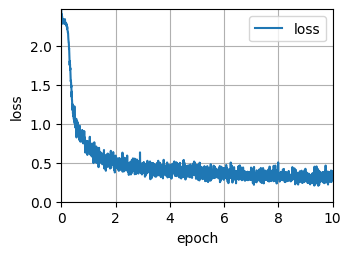

In [28]:
epoch_losses = trainer.train(
    data.get_train_dataloader_epochs(batch_size=256, num_epochs=10)
)
fig, ax = plt.subplots()
plot_loss(ax, epoch_losses)

In [29]:
evaluator = ClassificationEvaluator(lenet)
test_loss = evaluator.loss(data.get_test_dataloader(data.test_size))
print(f'Test loss: {test_loss:.4f}')
accuracy = evaluator.accuracy(data.get_test_dataloader(data.test_size))
print(f'Test accuracy: {accuracy:.2%}')

Test loss: 0.3501
Test accuracy: 86.74%


In [30]:
# save the model
lenet.save('lenet_fashion_mnist.pth')